In [2]:
!pip install pyreadstat==1.1.9
import pandas as pd
from google.colab import drive
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyreadstat as prs
drive.mount('/content/gdrive') #esto es porque debido a circunstancias con nuestras pcs tuvimos que programar en colab

dfdatos2024input=pd.read_excel(r"/content/gdrive/MyDrive/Colab Notebooks/TP3/usu_individual_T124.xlsx")
dfdatos2004input=pd.read_stata(r"/content/gdrive/MyDrive/Colab Notebooks/TP3/Individual_t104.dta")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 28.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [3]:
dfdatos2024=dfdatos2024input
dfdatos2004=dfdatos2004input

In [4]:

dfdatos2004 = dfdatos2004[
    (dfdatos2004['aglomerado'] == 'Ciudad de Buenos Aires') |
    (dfdatos2004['aglomerado'] == 'Partidos del GBA')
]
dfdatos2024 = dfdatos2024[
    (dfdatos2024['AGLOMERADO'] == 33) |
    (dfdatos2024['AGLOMERADO'] == 32)
]

print(dfdatos2004['aglomerado'].value_counts())
print(dfdatos2024['AGLOMERADO'].value_counts())



aglomerado
Partidos del GBA                   5811
Ciudad de Buenos Aires             1836
Gran La Plata                         0
Jujuy - Palpalá                       0
Mar del Plata - Batán                 0
Ushuaia - Río Grande                  0
Santa Rosa - Toay                     0
Gran Tucumán - Tafí Viejo             0
Gran San Juan                         0
San Luis - El Chorrillo               0
La Rioja                              0
Salta                                 0
Gran Catamarca                        0
Río Gallegos                          0
Santiago del Estero - La Banda        0
Bahía Blanca - Cerri                  0
Neuquén - Plottier                    0
Formosa                               0
Concordia                             0
Gran Córdoba                          0
Corrientes                            0
Gran Mendoza                          0
Comodoro Rivadavia - Rada Tilly       0
Gran Resistencia                      0
Posadas                      

In [5]:
columnas = ['ch06', 'p21']

for col in columnas:
    dfdatos2004[col] = pd.to_numeric(dfdatos2004[col], errors='coerce')

dfdatos2004 = dfdatos2004.dropna(subset=columnas)

<ipython-input-5-dec40a942021>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdatos2004[col] = pd.to_numeric(dfdatos2004[col], errors='coerce')


In [6]:
dfdatos2004['ch06']=dfdatos2004['ch06'].astype(int)
dfdatos2004 = dfdatos2004[dfdatos2004['ch06'] >= 0]
dfdatos2004 = dfdatos2004[dfdatos2004['p21'] >= 0]

In [7]:

dfdatos2024 = dfdatos2024[dfdatos2024['CH06'] >= 0]
dfdatos2024 = dfdatos2024[dfdatos2024['P21'] >= 0]


In [8]:
dfdatos2004['ch04'] = dfdatos2004['ch04'].replace({'Varón': 1, 'Mujer': 2})

dfdatos2004['ch07'] = dfdatos2004['ch07'].replace({'Unido': 1, 'Casado': 2,'Separado o divorciado':3, 'Viudo':4,'Ns./Nr.':0,'Soltero':5})

mapeosalud = {'Obra social (incluye PAMI)': 1,'No paga ni le descuentan': 2,'Mutual/Prepaga/Servicio de emergencia': 3,'Obra social y mutual/prepaga/servicio de emergencia': 4,'Planes y seguros públicos': 5,'Ns./Nr.': 0,  'Obra social, mutual/prepaga/servicio de emergencia y planes': 6,'Obra social y planes y seguros públicos': 7,'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 8}

dfdatos2004['ch08'] = dfdatos2004['ch08'].map(mapeosalud)

dfdatos2004['ch08'] = pd.to_numeric(dfdatos2004['ch08'], errors='coerce')


mapeonivel = {'Primaria Incompleta (incluye educación especial)': 1,'Primaria Completa': 2,'Secundaria Incompleta': 3,'Secundaria Completa': 4,'Superior Universitaria Incompleta': 5,'Superior Universitaria Completa': 6,'Sin instrucción': 7,'Ns./ Nr.': 9  }

dfdatos2004['nivel_ed'] = dfdatos2004['nivel_ed'].map(mapeonivel)

dfdatos2004['nivel_ed'] = pd.to_numeric(dfdatos2004['nivel_ed'], errors='coerce')

mapeoestado = {'Entrevista individual no realizada (no respuesta al Cuestionario Individual)': 0,'Ocupado': 1,'Desocupado': 2,'Inactivo': 3,'Menor de 10 años': 4}

dfdatos2004['estado'] = dfdatos2004['estado'].map(mapeoestado)

dfdatos2004['estado'] = pd.to_numeric(dfdatos2004['estado'], errors='coerce')

maepoinac = {'Jubilado / Pensionado': 1,'Rentista': 2,'Estudiante': 3,'Ama de casa': 4,'Menor de 6 años': 5,'Discapacitado': 6,'Otros': 7}

dfdatos2004['cat_inac'] = dfdatos2004['cat_inac'].map(maepoinac)

dfdatos2004['cat_inac'] = pd.to_numeric(dfdatos2004['cat_inac'], errors='coerce')

<ipython-input-8-2c90d14c68cc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfdatos2004['ch04'] = dfdatos2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
<ipython-input-8-2c90d14c68cc>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dfdatos2004['ch04'] = dfdatos2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
<ipython-input-8-2c90d14c68cc>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [9]:
dfdatos2004['ano'] = 2004
dfdatos2024['ano'] = 2024

In [10]:
dfcorr2024 = dfdatos2024[['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]
dfcorr2004 = dfdatos2004[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]



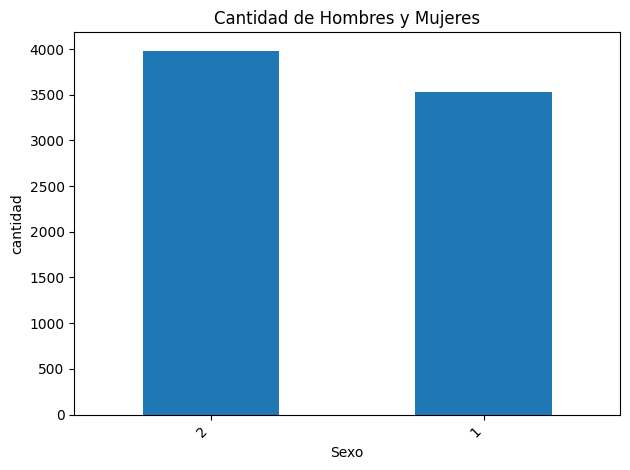

In [11]:
dfdatos2004['ch04'].value_counts().plot(kind='bar')

plt.title('Cantidad de Hombres y Mujeres 2004')
plt.xlabel('Sexo')
plt.ylabel('cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

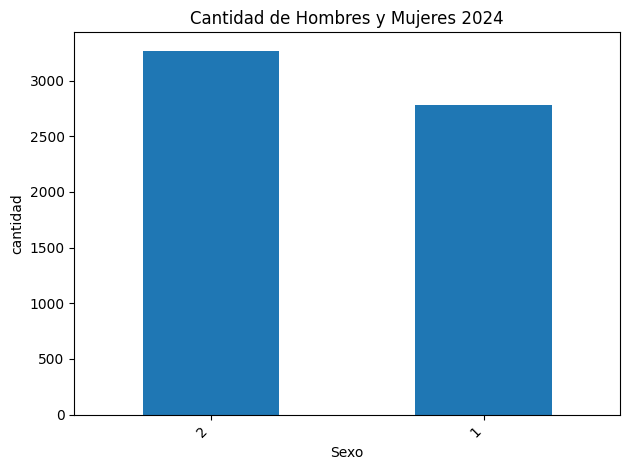

In [12]:

dfdatos2024['CH04'].value_counts().plot(kind='bar')

plt.title('Cantidad de Hombres y Mujeres 2024')
plt.xlabel('Sexo')
plt.ylabel('cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: >

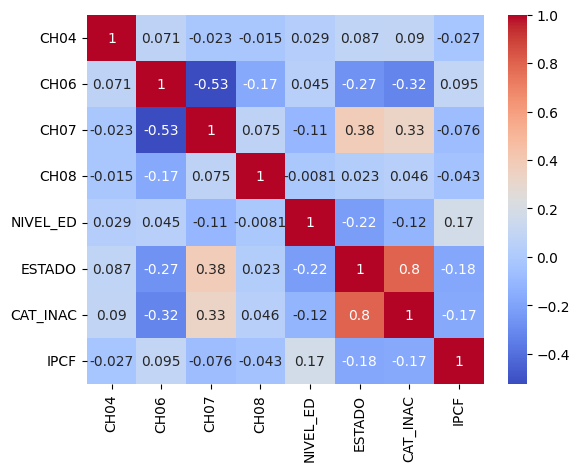

In [13]:
sns.heatmap(dfcorr2024.corr(),annot=True, cmap='coolwarm')

<Axes: >

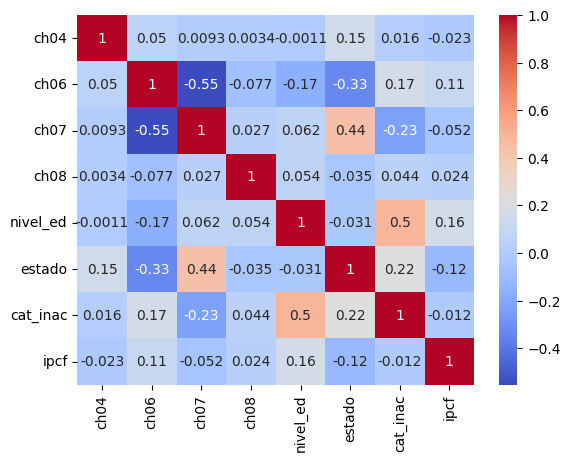

In [14]:
sns.heatmap(dfcorr2004.corr(),annot=True, cmap='coolwarm')

In [15]:
df2004_subset = dfdatos2004[['estado', 'ipcf']]
df2024_subset = dfdatos2024[['ESTADO', 'IPCF']]

df2024_subset = df2024_subset.rename(columns={'ESTADO': 'estado', 'IPCF':'ipcf'})

dfpuntoe = pd.concat([df2004_subset, df2024_subset], ignore_index=True)

In [16]:
print(dfpuntoe['estado'].value_counts())
#hay 809 desempleados, y 5243 inactivos


estado
3.0    5459
1.0    5356
4.0    1861
2.0     839
0.0      41
Name: count, dtype: int64


In [17]:
print(dfpuntoe.groupby('estado')['ipcf'].mean())

estado
0.0         0.000000
1.0    125263.672625
2.0     31655.957950
3.0     63898.042020
4.0     43034.334177
Name: ipcf, dtype: float64


Pregunta 3
Uno de los grandes problemas de la EPH es la creciente cantidad de
hogares que no reportan sus ingresos (ver por ejemplo el siguiente
informe). ¿Cuántas personas no respondieron cuál es su condición de
actividad? Guarden como una base distinta llamada respondieron las
observaciones donde respondieron la pregunta sobre su condición de
actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una
base bajo el nombre norespondieron.

In [18]:
df2004_subset = dfdatos2004[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf','ano']]
df2004_subset = df2004_subset.rename(columns={'ch04': 'CH04','ch06': 'CH06','ch07': 'CH07', 'ch08': 'CH08','nivel_ed': 'NIVEL_ED','estado': 'ESTADO','cat_inac': 'CAT_INAC','ipcf': 'IPCF'})

df2024_subset = dfdatos2024[['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF','ano']]

In [19]:
dfcompleto=pd.concat([df2004_subset, df2024_subset], ignore_index=True)
print(dfcompleto['ESTADO'].value_counts())

#no respondieron 41 personas

ESTADO
3.0    5459
1.0    5356
4.0    1861
2.0     839
0.0      41
Name: count, dtype: int64


In [20]:
respondieron=dfcompleto[dfcompleto['ESTADO']!=0]
norespondieron=dfcompleto[dfcompleto['ESTADO']==0]

PREGUNTA 4:
Agreguen a la base respondieron una columna llamada PEA
(Población Económicamente Activa) que tome 1 si están ocupados o
desocupados en ESTADO. Realicen un gráfico de barras mostrando la
composición por PEA para 2004 y 2024. Comenten los resultados.


In [21]:
respondieron['PEA'] = respondieron['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)
print(respondieron['PEA'].value_counts())

PEA
0    7330
1    6195
Name: count, dtype: int64


<ipython-input-21-1fa13edda038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PEA'] = respondieron['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)


<Axes: xlabel='ano', ylabel='count'>

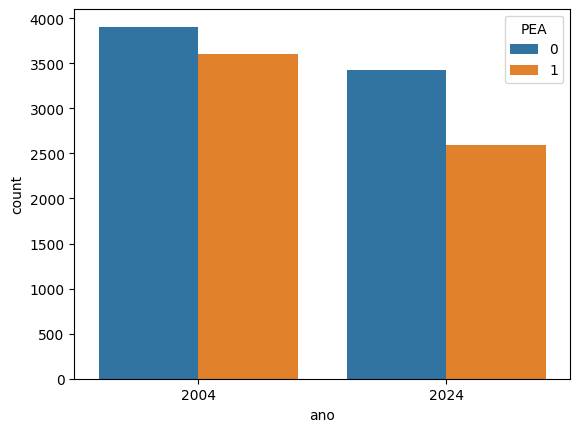

In [26]:
sns.countplot(x='ano', hue='PEA', data=respondieron)

PREGUNTA 5: Agreguen a la base respondieron una columna llamada PET
(Población en Edad para Trabajar) que tome 1 si están la persona tiene
entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando
la composición por PEA para 2004 y 2024. Comenten los resultados y
compare PET con PEA.

PET
1    8685
0    4840
Name: count, dtype: int64


<ipython-input-27-67c54f44b253>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)


<Axes: xlabel='ano', ylabel='count'>

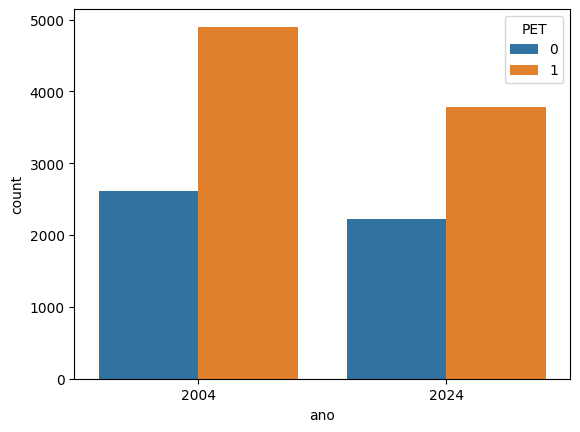

In [27]:
respondieron['PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)
print(respondieron['PET'].value_counts())

sns.countplot(x='ano', hue='PET', data=respondieron)

PREGUNTA 6: Por ultimo, agreguen la base respondieron una columna llamada
desocupado que tome 1 si esta desocupada. ¿Cuántas personas están
desocupadas en 2004 vs 2024?


In [28]:
respondieron['desocupado'] = respondieron['ESTADO'].apply(lambda x: 1 if x == 2 else 0)


<ipython-input-28-2e4b7aff11d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = respondieron['ESTADO'].apply(lambda x: 1 if x == 2 else 0)


In [29]:
print(respondieron.groupby('ano')['desocupado'].value_counts())

ano   desocupado
2004  0             6984
      1              528
2024  0             5702
      1              311
Name: count, dtype: int64
